<a href="https://colab.research.google.com/github/sokrypton/7.571/blob/main/L2/CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7.571 | 2024 | Central limit theorem
### In this notebook, we'll perform a series of simulations to better understand the central limit theorem

First, I just import a series of libraries that we'll need

In [ ]:
import numpy as np
from matplotlib import pylab as plt
from scipy.stats import ttest_ind
from scipy.stats import sem
import seaborn as sns
import pandas as pd
import math
sns.set_context('talk')

Here, I define some plotting methods we'll use later - don't worry about the details

In [ ]:
def jigger_plot(list_of_experiments, list_of_labels):
  f = plt.figure()
  ax = f.add_subplot(111)
  ax.boxplot(list_of_experiments, showfliers=False, widths=0.5)
  for exp_number, exp_values in enumerate(list_of_experiments):
      x_values = [exp_number+(np.random.rand()-0.5)/2+1 for i in range(len(exp_values))]
      ax.scatter(x_values, exp_values, label=list_of_labels[exp_number])
      ax.set_xlim(0.5, len(list_of_experiments)+0.5)
  ax.legend()

def hist_plot(control_dist, ko_dist, bins=20):
  plt.hist(control_dist, bins=bins, alpha=0.5, label='control')
  plt.hist(ko_dist, bins=bins, alpha=0.5, label='ko')
  plt.xlabel('protein X lifetimes')
  plt.ylabel('# molecules with lifetime x')

## 0 | Review of distributions & sampling
Let's start by comparing **population** distributions.

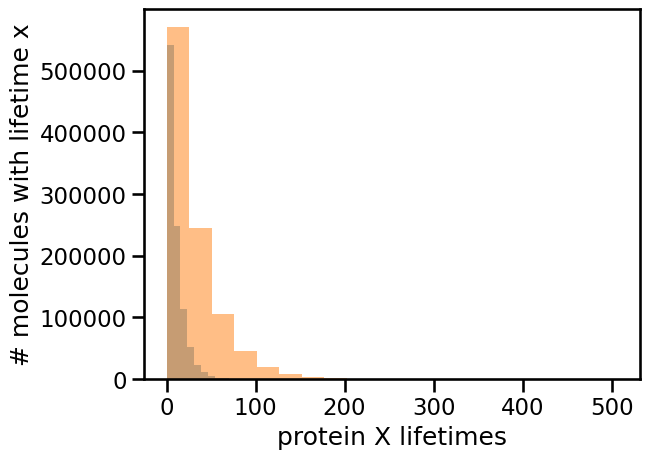

In [ ]:
### used to define the number of points/smoothness of the histograms
computed_points = 1000000

### define our distributions
control_lambda = 10 #What does this parameter control? How does it relate to the average lifetime?
control_proteinX_lifetimes = np.random.exponential(control_lambda,computed_points) #This is the population probability distribution

ko_lambda = 30 #Is the average lifetime longer or shorter?
ko_proteinX_lifetimes = np.random.exponential(ko_lambda,computed_points)

### plot our distributions
hist_plot(control_proteinX_lifetimes, ko_proteinX_lifetimes)

Now, let's actually do an experiment - we will randomly sample from our underlying distrubtion number_replicates times

In [ ]:
def do_an_experiment(underlying_distribution, number_replicates):
    return np.random.choice(underlying_distribution, number_replicates, replace=True) #This function simply "samples" from the underlying distribution number_replicates times

In the following cells, we'll simulate measuring 200 molecule lifetimes.
  * What do you expect the mean values to be for the control and ko conditions?

In [ ]:
control_measurements = do_an_experiment(control_proteinX_lifetimes, 200) #Here, I sample 200 values - this is equivalent to looking at 200 spots in the micrsocope
print('--measurements of control protein lifetimes--')
print(control_measurements)
print('--sample mean of control protein lifetimes--')
print(round(control_measurements.mean()))

--measurements of control protein lifetimes--
[5.98957010e+00 4.90422939e-02 1.73337475e+01 9.49803529e+00
 3.25593376e+00 4.37040091e+00 2.74140547e+00 2.00282048e+01
 7.60686871e-01 3.80592323e-01 4.62267496e+00 6.43270873e+00
 2.04045450e+01 4.00764253e+00 5.15927743e+00 4.78238043e+00
 2.94318622e+01 1.43328728e+01 1.40031407e+01 2.83316742e+00
 6.94886712e+00 8.23956103e+00 7.39351390e+00 1.32545019e+01
 4.52882722e-01 4.44596086e-01 3.94020212e+00 6.84863212e+00
 5.11275634e+00 1.07171488e+01 2.88546559e-01 1.49964303e+00
 4.95258705e+00 1.86493170e+00 2.06895876e+01 2.73394904e+01
 1.27742680e+00 6.20237665e+00 3.13125488e+00 1.79428201e+01
 2.65473909e+01 1.12687455e+01 1.07269430e+01 7.83480585e+00
 1.92896645e+00 1.27765519e+00 1.76505585e-01 1.10032436e+01
 1.58972428e+01 1.50955385e+01 1.06567553e+01 6.24358977e+00
 2.21110392e+01 4.83936688e+00 2.30561899e+00 2.17459917e+01
 6.70757033e+00 2.72016504e+01 5.58514258e+00 1.60194878e+01
 1.59607026e-01 4.41847601e+00 3.150159

In [ ]:
ko_measurements = do_an_experiment(ko_proteinX_lifetimes, 200)
print('--measurements of KO protein lifetimes--')
print(ko_measurements)
print('--sample mean of KO protein lifetimes--')
print(round(ko_measurements.mean()))

--measurements of KO protein lifetimes--
[3.25169952e+01 1.85606664e+01 9.97369792e+00 1.52526997e+01
 2.90408943e+01 1.18042261e+01 3.93356312e+00 9.84953448e+00
 3.97132151e+01 1.64690285e+01 1.06699364e+01 1.69701680e+01
 2.48207984e+01 6.90890327e+00 3.20900216e+00 1.14100019e+01
 2.71736006e+01 5.15389135e+01 1.21642089e+01 1.43969764e+01
 7.01910769e+00 7.64192202e+01 1.07487228e+02 3.56605193e+01
 4.02500981e+00 6.70840332e+00 9.00142691e+01 4.33427390e+00
 8.62694895e+00 9.58574024e+01 1.71559278e+01 1.22372448e+01
 3.22636487e+01 9.04960538e+01 1.29610939e+01 9.83393206e+00
 5.68665260e+01 2.42955173e+00 5.14644350e+01 9.22899167e+00
 1.88105309e+01 1.16383776e+00 3.02627159e+01 2.73025964e+01
 6.71677469e+00 2.35941226e+01 1.43409056e+02 3.29929222e+01
 1.06669036e+01 2.85684214e+00 3.65703938e+01 7.08481272e+01
 1.30497877e+00 3.32263652e+00 4.31895742e+01 5.86070944e+01
 1.15837281e+02 1.15242192e+01 9.48577477e+01 1.30280478e+01
 8.98814137e+00 1.29962087e+02 3.97078185e+0

Are the mean lifetimes you observed consistent with your expectations? If they differ, is that difference significant?
  * How can we quantify our confidence in this conclusion...more on this later

Let's first look at the distribution of molecule lifetimes we measured (also known as our sampling distribution).
  * If we have chosen values from our population randomly and independently, then we expect this sampling distribution to resemble our population distribution

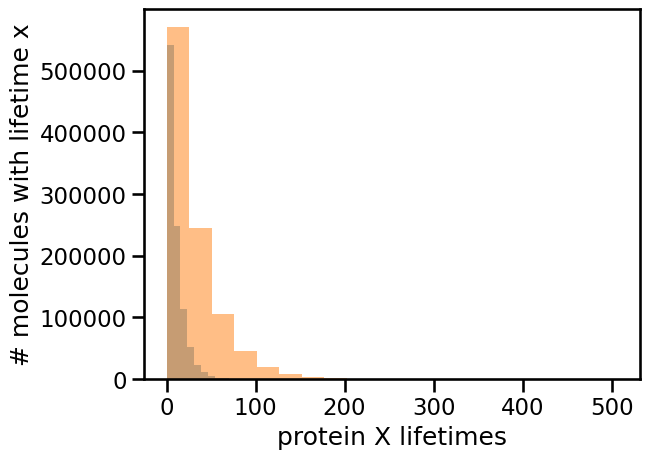

In [ ]:
hist_plot(control_proteinX_lifetimes, ko_proteinX_lifetimes)

Now, let's repeat this proceedure multiple times and look at the **distribution of the means** of the molecule lifetimes we observe in each replicated experiment

  * What shape do we expect for this distribution?

In [ ]:
def report_means_multiple_experiments(underlying_distribution, measurements_per_experiment, number_experiments, display=False):
    mean_values = [] #Here, I create a list to save the mean lifetime for each experiment.
    for i in range(number_experiments): #we will repeat our microscope experiment number_experiment times.
        observed_data = do_an_experiment(underlying_distribution, measurements_per_experiment)
        observed_mean = round(observed_data.mean(),2)
        mean_values.append(observed_mean)
    return mean_values

To help us see 'smooth' distributions, let's do 10,000 experiments.

In [ ]:
control_lambda = 10
control_proteinX_lifetimes = np.random.exponential(control_lambda,computed_points)
ko_lambda = 30
ko_proteinX_lifetimes = np.random.exponential(ko_lambda,computed_points)

measurements_per_experiment = 40
number_experiments = 10000
control_means = report_means_multiple_experiments(control_proteinX_lifetimes, measurements_per_experiment, number_experiments)
ko_means = report_means_multiple_experiments(ko_proteinX_lifetimes, measurements_per_experiment, number_experiments)

Text(0, 0.5, '# experiments with mean')

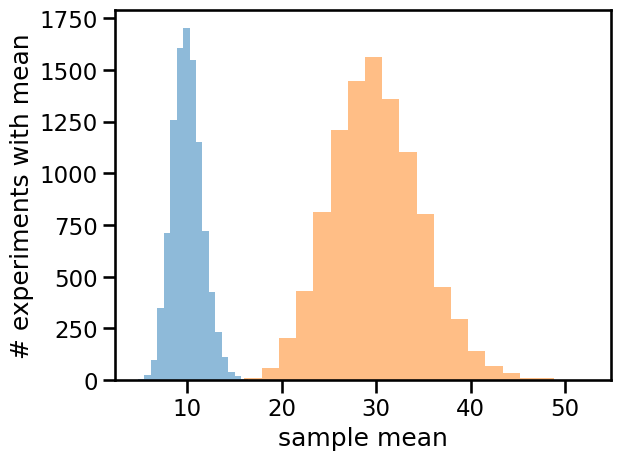

In [ ]:
hist_plot(control_means, ko_means)
plt.xlabel('sample mean')
plt.ylabel('# experiments with mean')

Weird, right? The distribution of the sample means is ~normal!
  * In any particular experiment, we might see a mean value anywhere in those distributions.
  * How many more points would we need to measure if we wanted to improve our precision 2-fold?

Text(0, 0.5, '# experiments with mean')

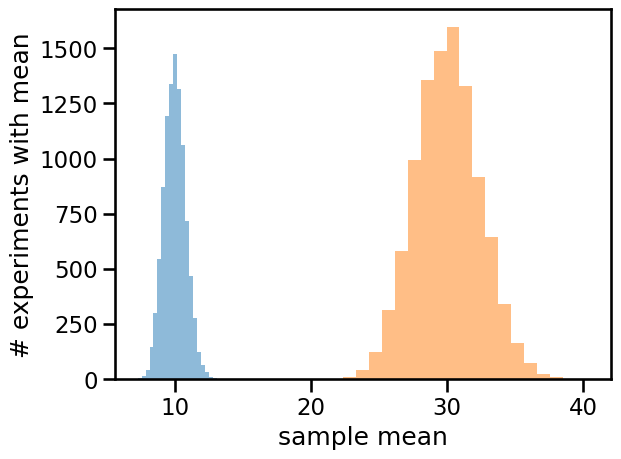

In [ ]:
control_lambda = 10
control_proteinX_lifetimes = np.random.exponential(control_lambda,computed_points)
ko_lambda = 30
ko_proteinX_lifetimes = np.random.exponential(ko_lambda,computed_points)

measurements_per_experiment = 40*4#Change me to the right value
number_experiments = 10000
new_control_means = report_means_multiple_experiments(control_proteinX_lifetimes, measurements_per_experiment, number_experiments)
new_ko_means = report_means_multiple_experiments(ko_proteinX_lifetimes, measurements_per_experiment, number_experiments)

hist_plot(new_control_means, new_ko_means)
plt.xlabel('sample mean')
plt.ylabel('# experiments with mean')

Text(0, 0.5, '# experiments with mean')

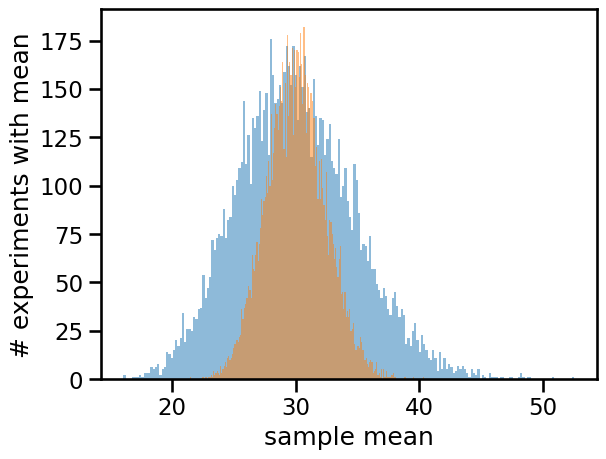

In [ ]:
hist_plot(ko_means, new_ko_means, bins=200)
plt.xlabel('sample mean')
plt.ylabel('# experiments with mean')